<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VAE 

A Variational Autoencoder (VAE) is a type of generative model that combines the principles of autoencoders and probabilistic modeling. VAEs are designed to learn a probabilistic mapping between high-dimensional input data and a lower-dimensional latent space, capturing meaningful representations of the input data. In a VAE, the encoder network maps input data to a distribution in the latent space, typically modeled as a Gaussian distribution. The decoder network then samples from this distribution to reconstruct the input data. During training, VAEs maximize a variational lower bound on the log-likelihood of the data. This involves minimizing the reconstruction error, ensuring that the generated samples resemble the input data, and regularizing the distribution of the latent space to follow the desired probability distribution.

VAEs have applications in generative tasks, such as image and text generation, and are valued for their ability to generate diverse and realistic samples while providing a structured latent space that allows for interpolation and manipulation of data representations.

In [ ]:
# Install the library

!pip install rapidae

## VAE for image data

In [15]:
from rapidae.data import load_dataset
from rapidae.models import VAE
from rapidae.models.base import VAE_Encoder_Conv_MNIST, VAE_Decoder_Conv_MNIST
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space, plot_reconstructions

### Data

Download and preprocess the dataset. In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

In [13]:
# Load MNIST dataset
data = load_dataset("MNIST")

# normalize data
x_train = data["x_train"] / 255
x_test = data["x_test"] / 255

print("Data shape:", x_train.shape)

2024-04-12 15:24:40 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-04-12 15:24:40 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-12 15:24:40 [INFO]: Downloading t10k-images-idx3-ubyte.gz...


2024-04-12 15:24:40 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...
2024-04-12 15:24:41 [INFO]: Deleting MNIST data...


Data shape: (60000, 28, 28, 1)


### Model

In this example, the model is the same defined in the [keras tutorial](https://keras.io/examples/generative/vae/#build-the-encoder)

In [37]:
input_dim = x_train.shape[1:]
# Model creation
model = VAE(input_dim=input_dim, 
            latent_dim=2,
            encoder=VAE_Encoder_Conv_MNIST(input_dim=input_dim, latent_dim=2), 
            decoder=VAE_Decoder_Conv_MNIST(input_dim=input_dim, latent_dim=2))

2024-04-12 16:12:38 [INFO]: Using provided encoder
2024-04-12 16:12:38 [INFO]: Using provided decoder
2024-04-12 16:12:38 [INFO]: No specific downstream task has been selected
2024-04-12 16:12:38 [INFO]: Using <function binary_crossentropy at 0x7f0e77fbe440> as reconstruction loss


### Training

In [38]:
pipe = TrainingPipeline(name='VAE_MNIST', 
                        learning_rate=0.001,
                        model=model, 
                        num_epochs=30, 
                        batch_size=128)

trained_model = pipe(x=x_train)

2024-04-12 16:12:45 [INFO]: +++ VAE_MNIST +++
2024-04-12 16:12:45 [INFO]: Creating folder in ./output_dir/VAE_MNIST_2024-04-12_16-12
2024-04-12 16:12:45 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/30

Epoch 1: loss improved from inf to 215.81775, saving model to ./output_dir/VAE_MNIST_2024-04-12_16-12/model.weights.h5
469/469 - 33s - 70ms/step - kl_loss: 1.6754 - loss: 215.8177 - reconstruction_loss: 214.1422
Epoch 2/30

Epoch 2: loss improved from 215.81775 to 169.94739, saving model to ./output_dir/VAE_MNIST_2024-04-12_16-12/model.weights.h5
469/469 - 31s - 65ms/step - kl_loss: 4.5505 - loss: 169.9474 - reconstruction_loss: 165.3969
Epoch 3/30

Epoch 3: loss improved from 169.94739 to 163.03148, saving model to ./output_dir/VAE_MNIST_2024-04-12_16-12/model.weights.h5
469/469 - 31s - 66ms/step - kl_loss: 5.0610 - loss: 163.0315 - reconstruction_loss: 157.9705
Epoch 4/30

Epoch 4: loss improved from 163.03148 to 160.36325, saving model to ./output_dir/VAE_MNIST_2024-04-12_16-12/model.weights.h5
469/469 - 31s - 66ms/step - kl_loss: 5.2937 - loss: 160.3633 - reconstruction_loss: 155.0695
Epoch 5/30

Epoch 5: loss improved from 160.36325 to 158.65477, saving model to ./outp

2024-04-12 16:27:38 [INFO]: Restoring best model
2024-04-12 16:27:38 [INFO]: Best model restored


### Evaluation

In [39]:
outputs = trained_model.predict(x_test)
print("Ouput keys:", outputs.keys())

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Ouput keys: dict_keys(['z', 'z_mean', 'z_log_var', 'x_recon'])


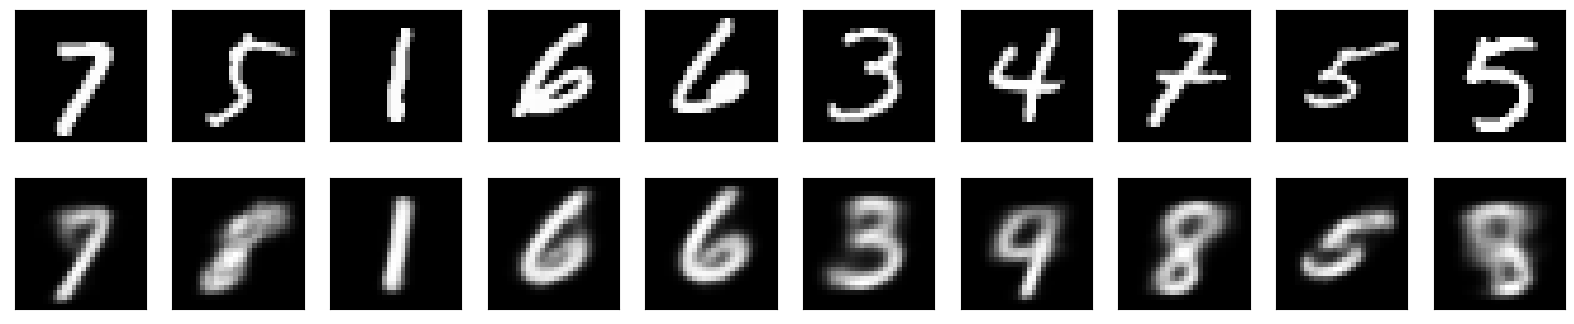

In [40]:
plot_reconstructions(x_test, outputs['x_recon'])

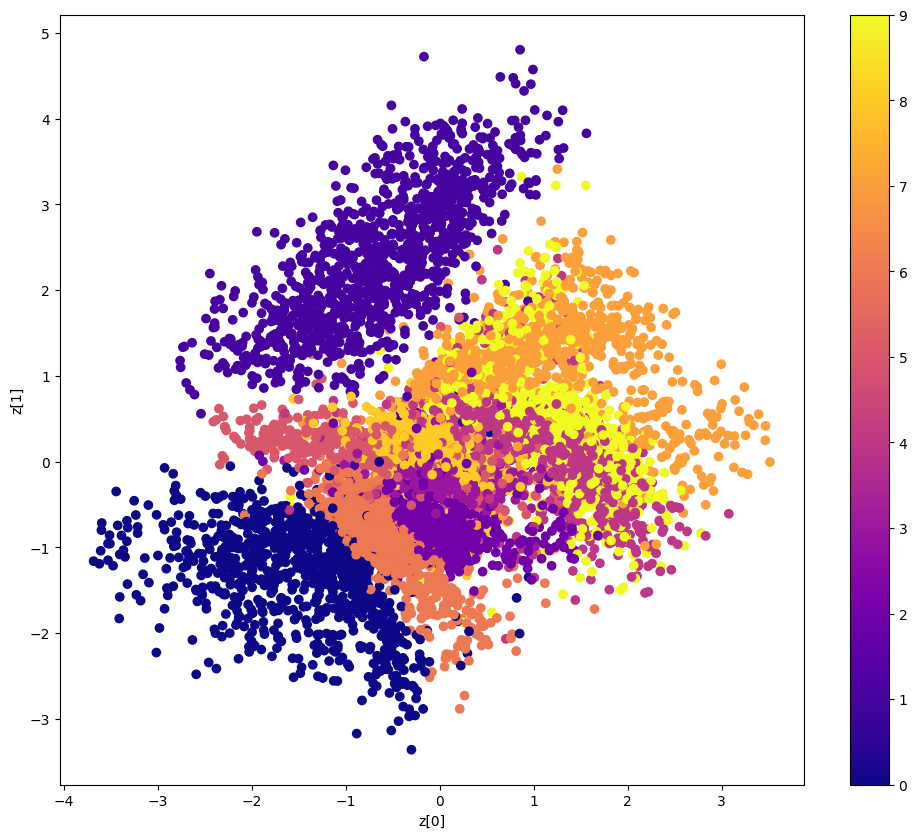

In [41]:
plot_latent_space(outputs['z'], data["y_test"])

## VAE for time series

In [2]:
from rapidae.data import load_dataset
from rapidae.models import VAE
from rapidae.models.rvae import Encoder, Decoder
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space, plot_reconstructions

2024-04-15 17:16:59.170288: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 17:16:59.501871: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 17:17:00.617228: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Data

In [3]:
# Load senoid dataset
data = load_dataset("SineWave")

x_train = data['x_train']
x_test = data['x_test']

print("Data shape:", x_train.shape)

2024-04-15 17:17:03 [INFO]: Downloading sine_wave.npy...


2024-04-15 17:17:04 [INFO]: Deleting data...


Data shape: (7017, 73, 1)


### Model

In [27]:
input_dim = x_train.shape[1:]

model = VAE(input_dim=input_dim, 
            latent_dim=2,
            encoder=Encoder(input_dim=input_dim, latent_dim=2), 
            decoder=Decoder(input_dim=input_dim, latent_dim=2))

2024-04-15 18:31:37 [INFO]: Using provided encoder
2024-04-15 18:31:37 [INFO]: Using provided decoder
2024-04-15 18:31:37 [INFO]: No specific downstream task has been selected
2024-04-15 18:31:37 [INFO]: Using mean_squared_error as the reconstruction loss function


### Training

In [6]:
pipe = TrainingPipeline(name='VAE_SENOID', 
                        learning_rate=0.0001,
                        model=model, 
                        num_epochs=100, 
                        batch_size=128)

trained_model = pipe(x=x_train)

2024-04-15 17:17:21 [INFO]: +++ VAE_SENOID +++
2024-04-15 17:17:21 [INFO]: Creating folder in ./output_dir/VAE_SENOID_2024-04-15_17-17
2024-04-15 17:17:21 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/100


2024-04-15 17:17:27.134561: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900



Epoch 1: loss improved from inf to 12.36545, saving model to ./output_dir/VAE_SENOID_2024-04-15_17-17/model.weights.h5
55/55 - 9s - 160ms/step - kl_loss: 0.8117 - loss: 12.3654 - reconstruction_loss: 11.5538
Epoch 2/100

Epoch 2: loss improved from 12.36545 to 6.10877, saving model to ./output_dir/VAE_SENOID_2024-04-15_17-17/model.weights.h5
55/55 - 3s - 47ms/step - kl_loss: 0.6799 - loss: 6.1088 - reconstruction_loss: 5.4289
Epoch 3/100

Epoch 3: loss improved from 6.10877 to 5.37325, saving model to ./output_dir/VAE_SENOID_2024-04-15_17-17/model.weights.h5
55/55 - 3s - 47ms/step - kl_loss: 0.1170 - loss: 5.3733 - reconstruction_loss: 5.2563
Epoch 4/100

Epoch 4: loss improved from 5.37325 to 5.28870, saving model to ./output_dir/VAE_SENOID_2024-04-15_17-17/model.weights.h5
55/55 - 3s - 47ms/step - kl_loss: 0.0371 - loss: 5.2887 - reconstruction_loss: 5.2516
Epoch 5/100

Epoch 5: loss improved from 5.28870 to 5.26597, saving model to ./output_dir/VAE_SENOID_2024-04-15_17-17/model.wei

2024-04-15 17:19:47 [INFO]: Restoring best model
2024-04-15 17:19:47 [INFO]: Best model restored


### Evaluation

In [11]:
outputs = trained_model.predict(x_test)
print("Ouput keys:", outputs.keys())

  8/220 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 

220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Ouput keys: dict_keys(['z', 'z_mean', 'z_log_var', 'x_recon'])


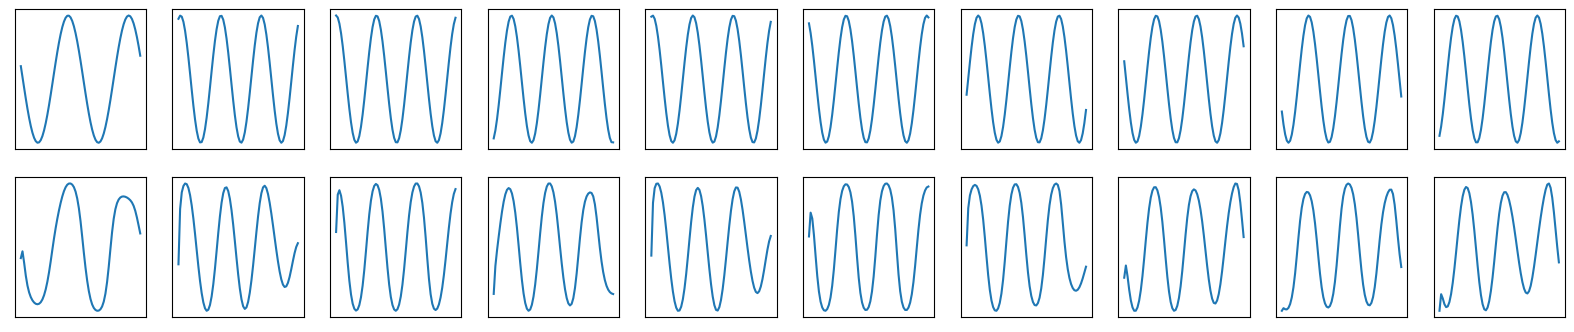

In [8]:
plot_reconstructions(x_test, outputs['x_recon'], type="ts")

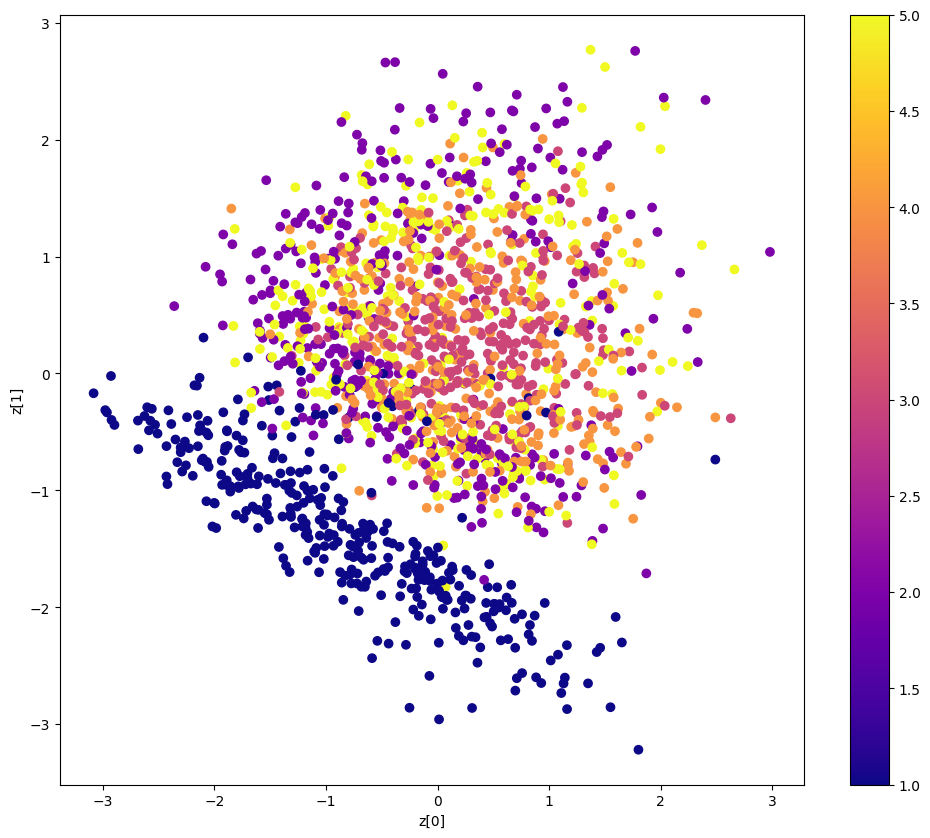

In [9]:
plot_latent_space(outputs['z'], data["y_test"])